<a href="https://colab.research.google.com/github/DucBox/Digit-Recognizer-Competition-Kaggle-/blob/main/Digit_Recognizer_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Đường dẫn tới file CSV
train_filename = '/content/train.csv'
test_filename = '/content/test.csv'
train_data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)

In [ ]:

# Tải dữ liệu huấn luyện

X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(train_data['label'])

# Tải dữ liệu kiểm thử

X_test = test_data.values.reshape(-1, 28, 28, 1).astype('float32') /  255.0

# Chia dữ liệu huấn luyện và validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:

model = models.Sequential([
    # Lớp Conv đầu tiên
    layers.Conv2D(32, (3, 3), padding='valid', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # Lớp Conv thứ hai
    layers.Conv2D(32, (3, 3), padding='valid'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # Lớp Pooling đầu tiên
    layers.MaxPooling2D(strides=(2, 2)),

    # Lớp Conv thứ ba
    layers.Conv2D(64, (3, 3), padding='valid'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # Lớp Conv thứ tư
    layers.Conv2D(64, (3, 3), padding='valid'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # Lớp Pooling thứ hai
    layers.MaxPooling2D(strides=(2, 2)),

    # Chuyển từ tensor sang vector
    layers.Flatten(),

    # Lớp Dense với 512 units
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # Lớp đầu ra với 10 lớp phân loại
    layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Thiết lập callback để lưu mô hình với độ chính xác validation tốt nhất
checkpoint = ModelCheckpoint(
    'best_model.h5',           # Tên file lưu mô hình
    monitor='val_accuracy',    # Giá trị để theo dõi
    save_best_only=True,       # Chỉ lưu khi là tốt nhất
    mode='max',                # Chế độ tối đa hóa độ chính xác
    verbose=1                  # Hiển thị thông báo chi tiết khi lưu mô hình
)

# Huấn luyện mô hình với ModelCheckpoint
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint]  # Thêm callback vào quá trình huấn luyện
)


Epoch 1/10
263/263 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9686
Epoch 1: val_accuracy improved from -inf to 0.24131, saving model to best_model.h5
263/263 [==============================] - 110s 409ms/step - loss: 0.1053 - accuracy: 0.9686 - val_loss: 2.8771 - val_accuracy: 0.2413
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


263/263 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9892
Epoch 2: val_accuracy improved from 0.24131 to 0.93702, saving model to best_model.h5
263/263 [==============================] - 105s 398ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.1841 - val_accuracy: 0.9370
Epoch 3/10
263/263 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9946
Epoch 3: val_accuracy improved from 0.93702 to 0.98488, saving model to best_model.h5
263/263 [==============================] - 101s 385ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.0508 - val_accuracy: 0.9849
Epoch 4/10
263/263 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9965
Epoch 4: val_accuracy improved from 0.98488 to 0.98905, saving model to best_model.h5
263/263 [==============================] - 103s 390ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 5/10
263/263 [==============================] - ETA: 0

In [ ]:
model.save('/content/drive/MyDrive/Competition/Digit_Recog/best_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_path = '/content/drive/MyDrive/Competition/Digit_Recog/best_model.h5'

# Tải mô hình
model = tf.keras.models.load_model(model_path)

In [ ]:


# Giả định `X_test` là tập dữ liệu kiểm tra và `model` là mô hình đã được huấn luyện
predictions = model.predict(X_test)
labels = np.argmax(predictions, axis=1)

# Tạo DataFrame cho submission
submission = pd.DataFrame({'ImageId': range(1, len(labels)+1), 'Label': labels})
submission.to_csv('submission.csv', index=False)




875/875 [==============================] - 25s 29ms/step


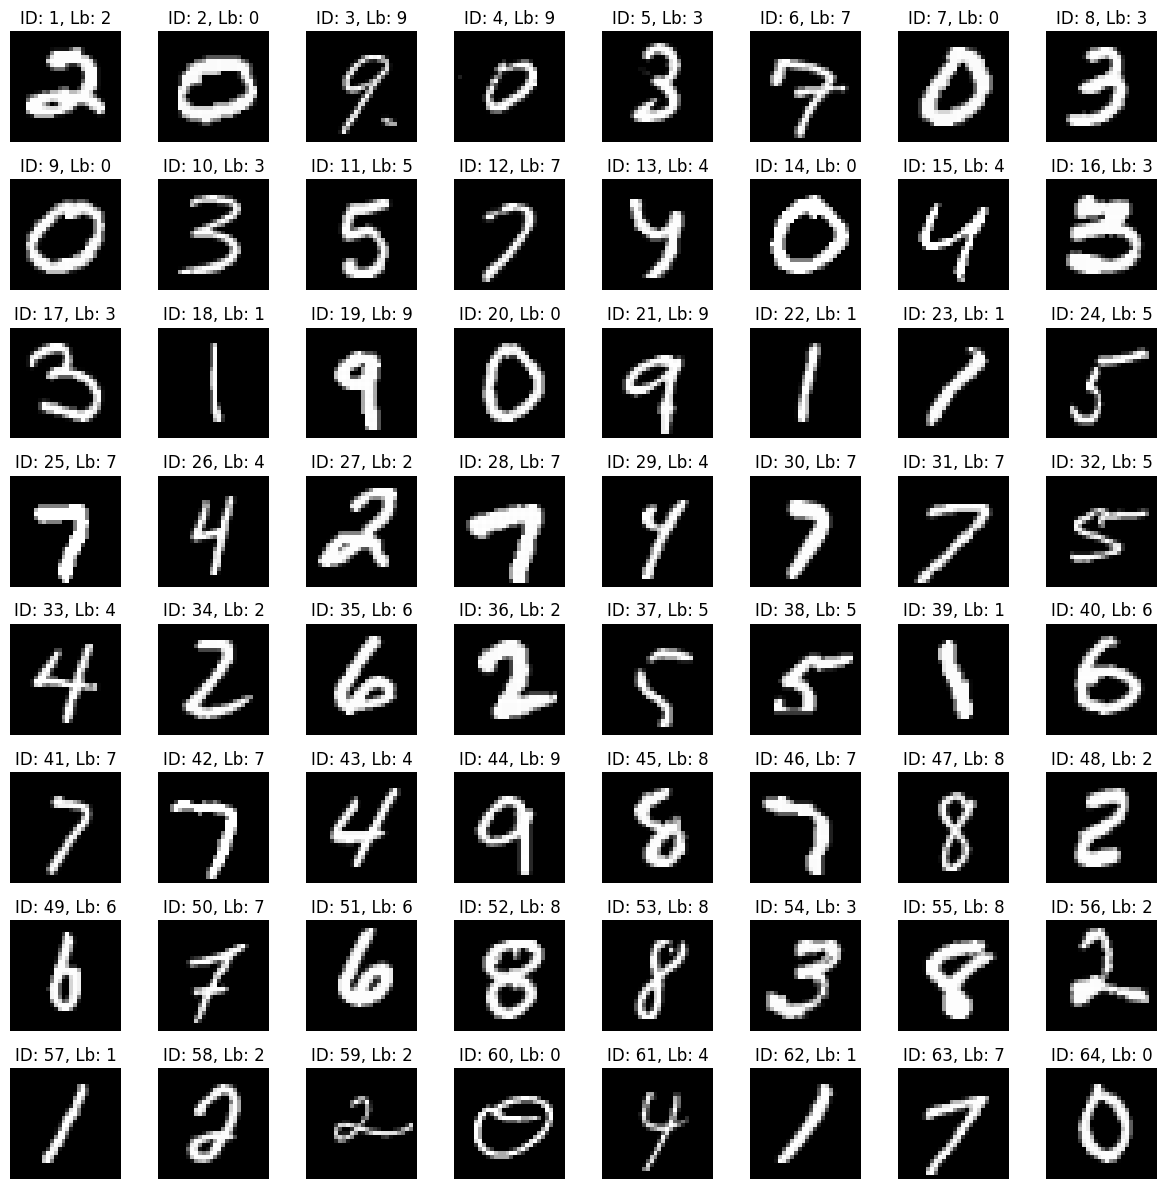

In [34]:
# Hàm để hiển thị một lưới các ảnh cùng với ImageID và nhãn
def plot_images(images, labels, nrows, ncols, start_id):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    axes = axes.ravel()

    for i in range(nrows * ncols):
        idx = start_id + i
        if idx < len(images):
            axes[i].imshow(images[idx], cmap='gray')
            axes[i].set_title(f'ID: {idx+1}, Lb: {labels[idx]}')
            axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Vì chỉ muốn hiển thị 64 ảnh đầu tiên
nrows, ncols = 8, 8
plot_images(X_test, labels, nrows, ncols, start_id=64*0)

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Tải file kaggle.json lên Colab
uploaded = files.upload()

# Tạo thư mục .kaggle và di chuyển file kaggle.json vào đó
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Cấp quyền cho file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c digit-recognizer


 59% 9.00M/15.3M [00:00<00:00, 90.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 127MB/s] 


In [ ]:
!unzip digit-recognizer.zip


Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
